In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Импортируем данные

In [48]:
df = pd.read_csv('kc_house_data.csv', sep=',')

Изучаем общую информацию о полученных данных

In [49]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

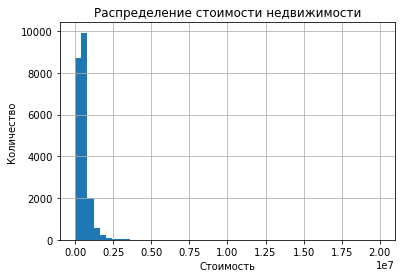

In [51]:
df.hist('price', bins=50, range=(0,2e+07));
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

Рассмотрим распределение жилой квадратуры


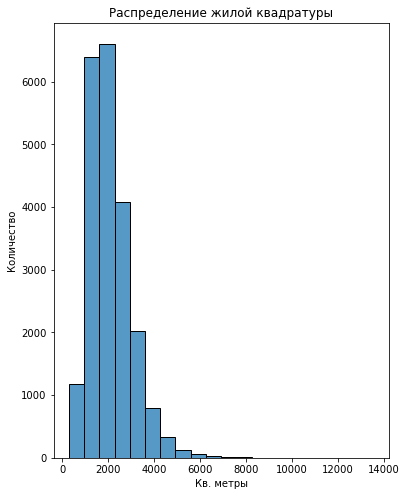

In [52]:
plt.figure(figsize=(6, 8))
sns.histplot(df['sqft_living'], bins=20)
plt.title('Распределение жилой квадратуры')
plt.xlabel('Кв. метры')
plt.ylabel('Количество');

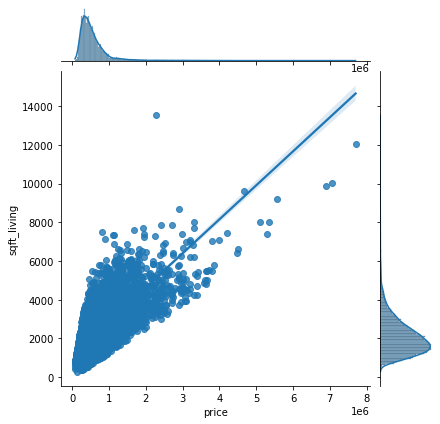

In [73]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

Чем больше жилой площади, тем выше стоимость недвижимости.

Рассмотрим количество домов по годам постройки

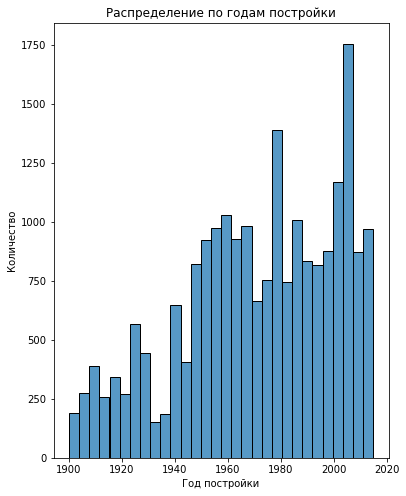

In [53]:
plt.figure(figsize=(6, 8))
sns.histplot(df['yr_built'], bins=30)
plt.title('Распределение по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

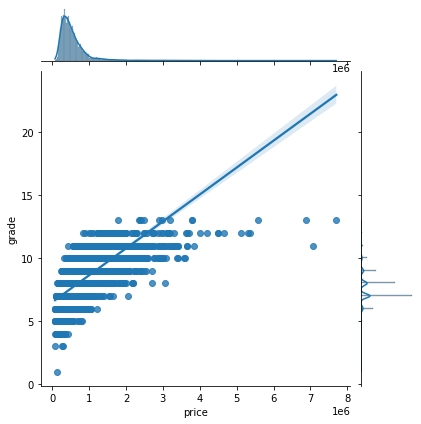

In [74]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

Самая дорогая недвижимость с наиболее высшим качеством постройки и лучшим дизайном.

Рассмотрим количество домов с видом на набережную

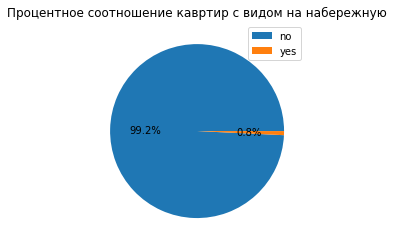

In [54]:
data = df['waterfront'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);
plt.title('Процентное соотношение кавртир с видом на набережную');

Изучите распределение этажей домов

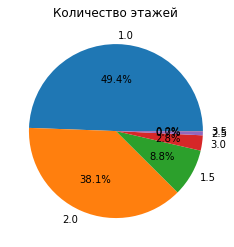

In [55]:
data = df['floors'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Количество этажей');

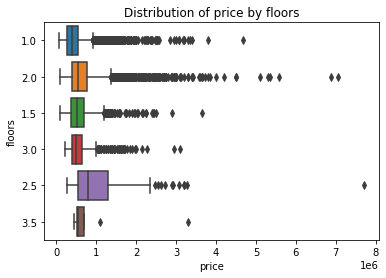

In [75]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Distribution of price by floors');

Самая дорогая недвижимость с количеством этажей 2.5

Изучим состояние домов

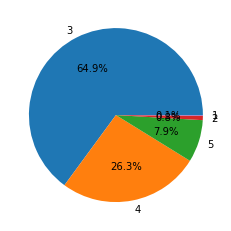

In [56]:
data = df['condition'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index);

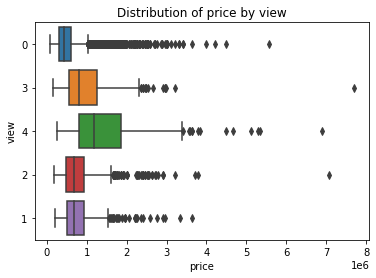

In [76]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');

При покупке недвижимости также оценивается вид. Дома с хорошим видом стоят дороже.